In [143]:
import pandas as pd
import re
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv("API_data/drinks.csv")

df = df[["idDrink", "strDrink", "strCategory", "strAlcoholic", "strGlass", "strIngredient1", "strIngredient2", "strIngredient3", "strIngredient4", "strIngredient5"]]
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

df.head()

,idDrink,strDrink,strCategory,strAlcoholic,strGlass,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5
0,17222,a1,cocktail,alcoholic,cocktail glass,gin,grand marnier,lemon juice,grenadine,NaN
1,13501,abc,shot,alcoholic,shot glass,amaretto,baileys irish cream,cognac,NaN,NaN
2,17225,ace,cocktail,alcoholic,martini glass,gin,grenadine,heavy cream,milk,egg white
3,14610,acid,shot,alcoholic,shot glass,151 proof rum,wild turkey,NaN,NaN,NaN
4,17837,adam,ordinary drink,alcoholic,cocktail glass,dark rum,lemon juice,grenadine,NaN,NaN


In [145]:
# ta funkcja zamienia dataframe'a takiego jak wyzej na dataframe'a w takim formacie jakiego oczekuje hypernetx
def parse_df(df):
  H_dict = {"drink": [], "ingredient": [], "properties": []}

  ingredient_cols = [col for col in df.columns if re.match(r"strIngredient\d+", col)]

  for _, row in df.iterrows():
    drink = row["strDrink"]
    for ing in ingredient_cols:
      ingredient = row[ing]
      if pd.notna(ingredient):
        H_dict["drink"].append(drink)
        H_dict["ingredient"].append(ingredient)
        H_dict["properties"].append({"category": row["strCategory"], "alcoholic": row["strAlcoholic"], "glass": row["strGlass"]})

  H_df = pd.DataFrame(H_dict)

  return H_df

Stworzę 2 sieci:
1. Małą (15 składników) - służącą do wizualizacji i tłumaczenia
2. Dużą (441 składników) - do uogólniania analizy na całą sieć

In [146]:
H_small_df = parse_df(df.sample(15, random_state=13))
H_small = hnx.Hypergraph(H_small_df, edge_col="drink", node_col="ingredient", misc_cell_properties="properties")

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


In [147]:
H_df = parse_df(df)
H = hnx.Hypergraph(H_df, edge_col="drink", node_col="ingredient", misc_cell_properties="properties")

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


Wizualizacja małej sieci:

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/s

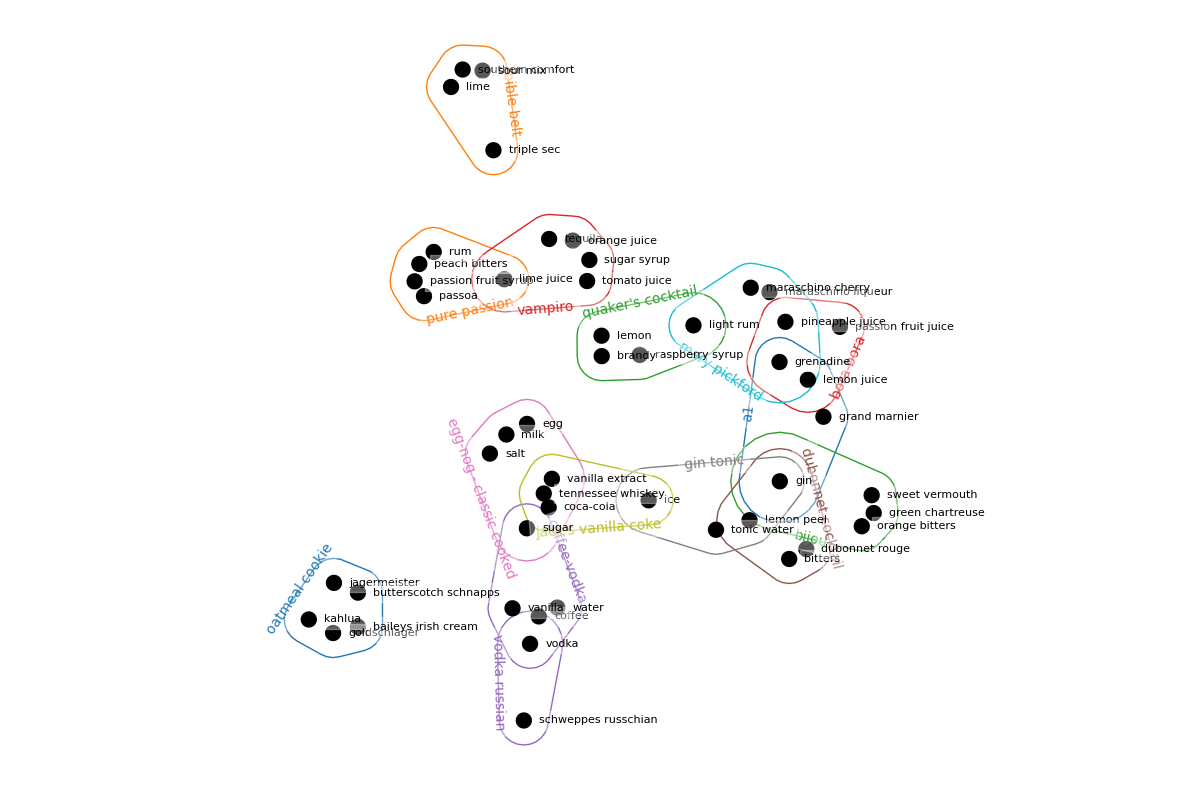

In [148]:
plt.figure(figsize=(15, 10))
hnx.draw(H_small, node_labels_kwargs={"fontsize": 8}, layout_kwargs={"seed": 314})

#### Analiza sąsiadów

Skupmy się na węźle "grenadine". Narysujmy uproszczoną wersję małej sieci, która będzie zawierać tylko węzęł "grenadine" i jego sąsiadów:

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/opt/miniconda3/envs/s

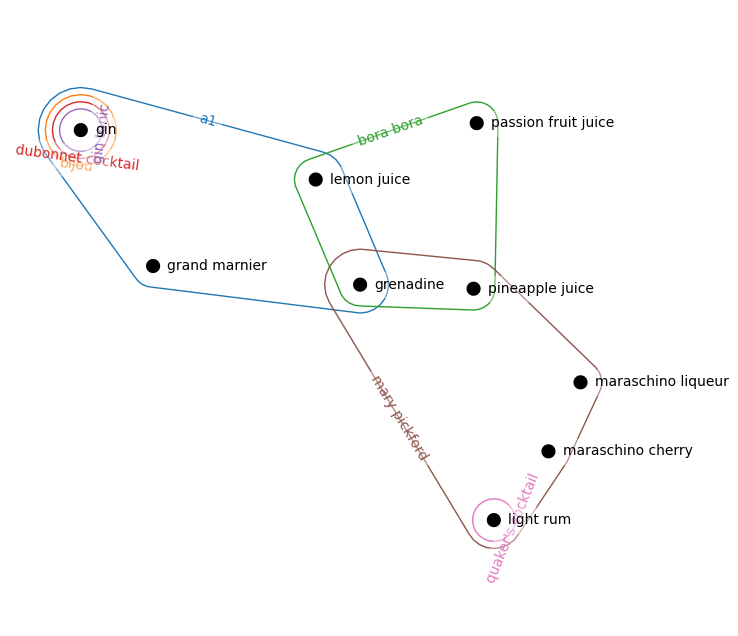

In [149]:
hnx.draw(H_small.restrict_to_nodes(["grenadine"] + list(H_small.neighbors("grenadine"))))

Metoda "neighbors" zwraca wszystkich sąsiadów węzła, czyli po prostu wszystkie węzły które są narysowane wyżej. W tym przypadku sąsiadów jest 8:

In [150]:
H_small.neighbors("grenadine")

['gin',
 'grand marnier',
 'lemon juice',
 'light rum',
 'maraschino cherry',
 'maraschino liqueur',
 'passion fruit juice',
 'pineapple juice']

Ale jak dodamy argument "s=2", to dostaniemy tylko "lemon juice" i "pineapple juice":

In [151]:
H_small.neighbors("grenadine", s=2)

['lemon juice', 'pineapple juice']

Wynika to z tego że "lemon juice" i "pineapple juice" są składnikami, które występują razem z "grenadine" w co najmniej 2 drinkach:
* "lemon juice" występuje z "grenadine" w drinkach "a1" i "bora bora"
* "pineapple juice" występuje z "grenadine" w drinkach "bora bora" i "mary pickford"

Wniosek jest taki, że chociaż "grenadine" ma 8 sąsiadów, to 2 z nich ("lemon juice" i "pineapple juice") są bardziej "blisko" niż pozostałe 6. Czyli "lemone juice" i "pineapple juice" pasują do "grenadine" najlepiej (w sensie że jak mamy "grenadine" w domu to najlepiej dodać do tego "lemon juice" albo "pineapple juice").

Uogólnijmy to na całą sieć:

In [152]:
H.neighbors("grenadine", s=14)

['gin']

Największe "s" dla jakiego zwracana jest niepusta lista wynosi 14. Zwracany jest "gin". Oznacza to, że "grenadine" i "gin" występują razem w 14 drinkach. Czyli "gin" najbardziej pasuje do "grenadine".

Możemy zatem napisać ogólną funkcję, która przyjmuję składnik i zwraca składnik (lub składniki) które najbardziej pasują do argumentu:

In [153]:
def get_best_complement(ing):
  i = 1
  while True:
    neighbors = list(H.neighbors(ing, s=i+1))
    if len(neighbors) == 0:
      return H.neighbors(ing, s=i), i
    i += 1

In [154]:
print(get_best_complement("grenadine"))
print(get_best_complement("vodka"))

(['gin'], 14)
(['orange juice'], 11)


Możemy też znaleźć parę najbardziej pasujących do siebie składników:

In [155]:
best_ings = []
best_neighbors = []
max_s = 0

for ing in H.nodes:
    neighbors, s = get_best_complement(ing)
    if s > max_s:
        max_s = s
        best_ings = [ing]
        best_neighbors = [neighbors]
    elif s == max_s:
        best_ings.append(ing)
        best_neighbors.append(neighbors)

print("Max S:", max_s)
for ing, neighbors in zip(best_ings, best_neighbors):
    print("Składnik:", ing)
    print("Sąsiedzi:", neighbors)

Max S: 19
Składnik: gin
Sąsiedzi: ['lemon juice']
Składnik: lemon juice
Sąsiedzi: ['gin']


Wypisało się 2 razy, bo "gin" to najlepszy składnik dla "lemon juice" a "lemon juice" to najlepszy składnik dla "gin". Ale wniosek jest z tego taki, ze w tym zbiorze danych 2 najbardziej pasujące do siebie składniki to "gin" i "lemon juice". Występują one razem w 19 drinkach.

Poza tym, możemy też dla danego składnika narysować wykres mówiący o tym ile jest innych składników, które dzielą n drinków z danym składnikiem. Na przykładzie "grenadine":

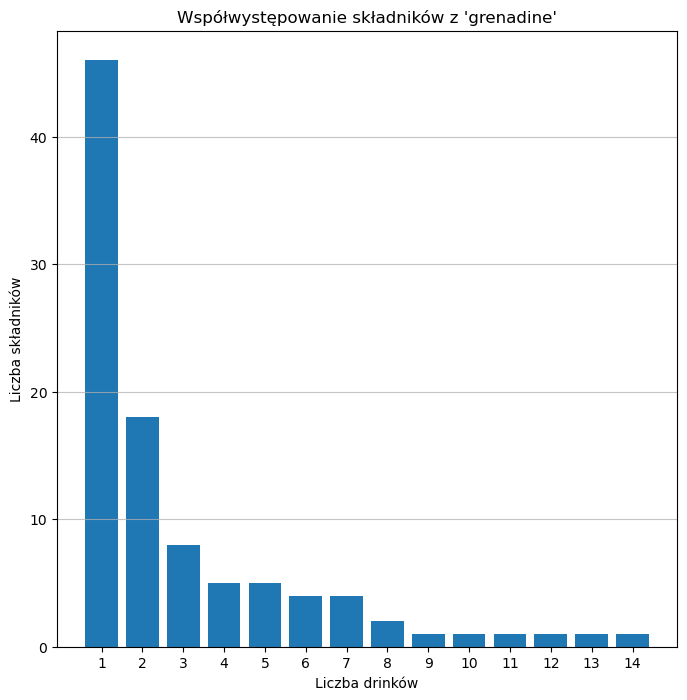

In [156]:
x_range = range(1, get_best_complement("grenadine")[1] + 1)
num_of_complements = [len(H.neighbors("grenadine", s=i)) for i in x_range]

plt.bar(x_range, num_of_complements)
plt.xlabel("Liczba drinków")
plt.xticks(x_range)
plt.ylabel("Liczba składników")
plt.title("Współwystępowanie składników z 'grenadine'")
plt.grid(axis='y', alpha=0.75)
plt.show()

Czyli jest ponad 40 składników, które występują z "grenadine" w dokładnie 1 drinku. Jest 1 składnik, który występuje z "grenadine" w 14 drinkach.

Można zrobić z tego funkcję:

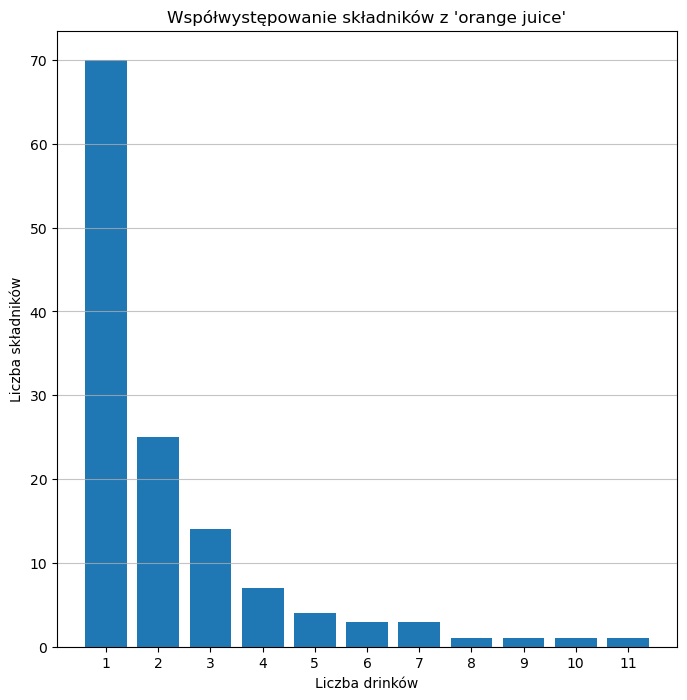

In [157]:
def plot_complement_distribution(ing):
  x_range = range(1, get_best_complement(ing)[1] + 1)
  num_of_complements = [len(H.neighbors(ing, s=i)) for i in x_range]

  plt.bar(x_range, num_of_complements)
  plt.xlabel("Liczba drinków")
  plt.xticks(x_range)
  plt.ylabel("Liczba składników")
  plt.title(f"Współwystępowanie składników z '{ing}'")
  plt.grid(axis='y', alpha=0.75)
  plt.show()

plot_complement_distribution("orange juice")

#### Analiza connectedness

Narysujmy dla przypominenia małą sieć:

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/opt/miniconda3/envs/s

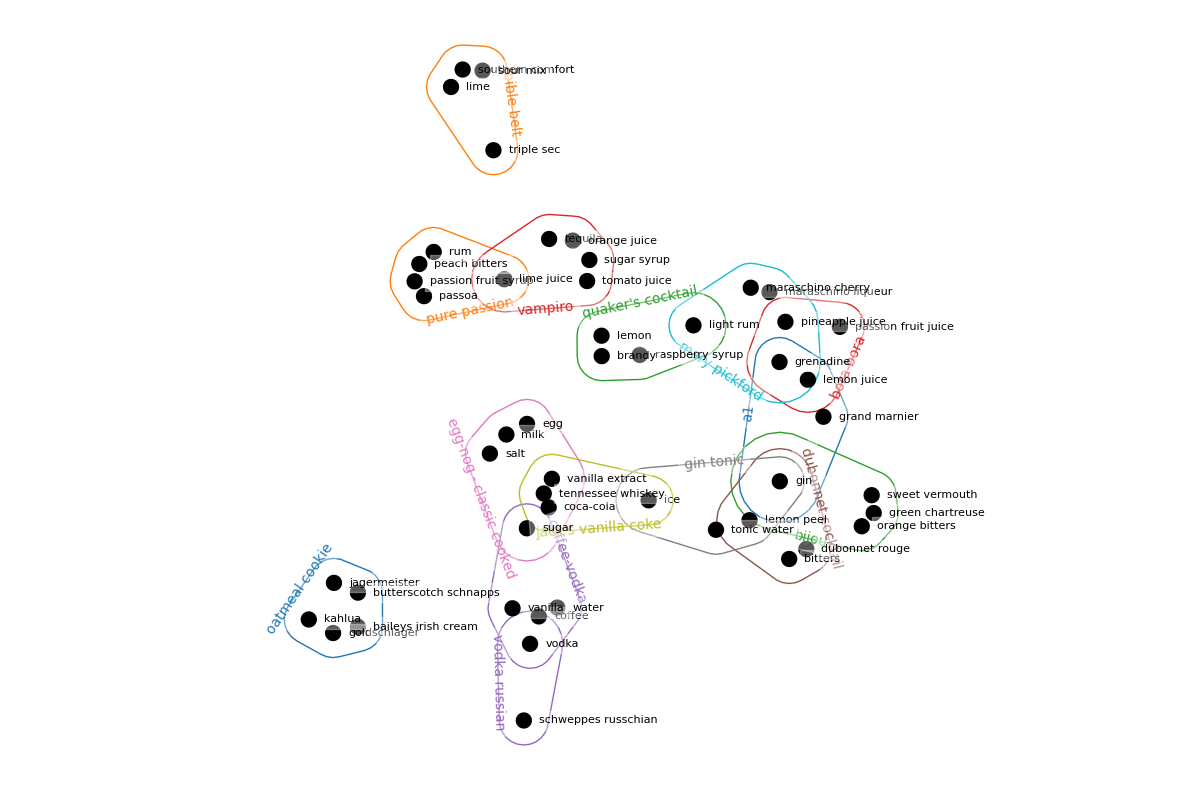

In [158]:
plt.figure(figsize=(15, 10))
hnx.draw(H_small, node_labels_kwargs={"fontsize": 8}, layout_kwargs={"seed": 314})

In [159]:
H_small.is_connected(s=1)

False

Mała sieć nie jest połączona, co zgadza się z rysunkiem.

Uogólnijmy to na całą sieć:

In [160]:
H.is_connected(s=1), H.is_connected(s=2)

(True, False)

Czyli duża sieć jest 1-connected ale nie jest 2-connected.

To znaczy, że jak weźmiemy 2 losowe węzły (składniki) to istnieje sekwencja krawędzi (drinków), która łączy te 2 węzły. Przy czym każde 2 krawędzie na tej ścieżce mają co najmniej 1 węzeł wspólny.

Własność ta nie zachodzi, kiedy będziemy rozważać ścieżkę w której każde 2 krawędzie mają co najmniej 2 wspóle węzły.

Spójrzymy jeszcze na liczbę komponentów:

In [161]:
len(list(H_small.s_components(s=1))), len(list(H.s_components(s=1)))

(4, 1)

Czyli mała sieć składa się z 4 komponentów, a duża z 1. Mowa tutaj o komponentach dla "s=1", czyli w takim klasycznym rozumieniu komponentów, jak w zwykłych grafach.

## Rozkład stopni węzłów

(array([250.,  22.,  10.,   7.,   0.,   3.,   0.,   1.,   0.,   1.]),
 array([ 1. ,  9.3, 17.6, 25.9, 34.2, 42.5, 50.8, 59.1, 67.4, 75.7, 84. ]),
 <BarContainer object of 10 artists>)

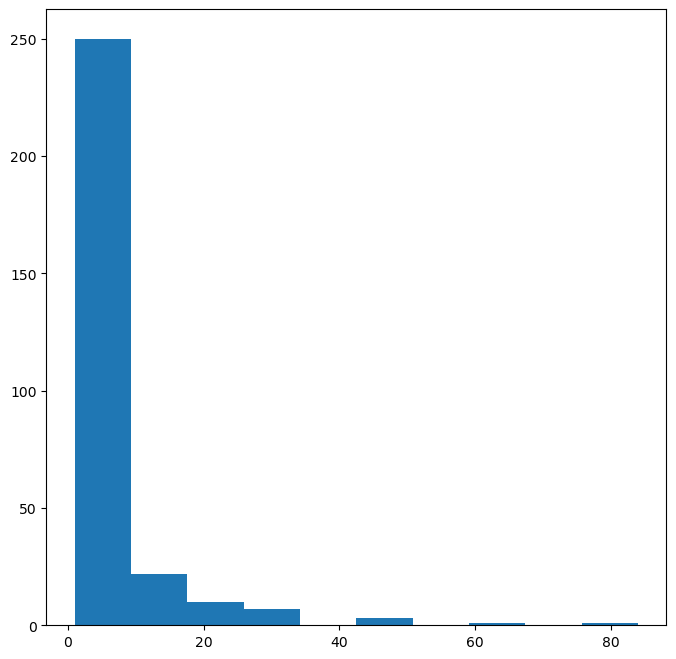

In [162]:
node_degrees = []

for ing in H.nodes:
    node_degrees.append(H.degree(ing))

plt.hist(node_degrees)

Węzęł o największym stopniu:

In [163]:
highest_deg_ing, highest_deg = None, 0

for ing in H.nodes:
    if H.degree(ing) > highest_deg:
        highest_deg = H.degree(ing)
        highest_deg_ing = ing

highest_deg_ing, highest_deg

('gin', 84)

In [164]:
# node'y o degree >= 20
for ing in H.nodes:
    if (H.degree(ing) >= 20):
      print(ing, H.degree(ing))

sugar 49
grenadine 31
orange juice 46
gin 84
water 28
milk 21
lemon 33
triple sec 24
ice 33
pineapple juice 20
lime juice 32
lime 28
powdered sugar 25
lemon juice 50
coffee 23
light rum 31
vodka 67


In [165]:
# liczba składników
len(H.nodes)

294

In [166]:
import hypernetx.algorithms.hypergraph_modularity as hmod

K = hmod.kumar(H_small)

list(K)

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:1616: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.6083333333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self._properties.loc[item_key, prop_name] = prop_val


[{'bitters',
  'dubonnet rouge',
  'gin',
  'green chartreuse',
  'lemon peel',
  'orange bitters',
  'sweet vermouth',
  'tonic water'},
 {'brandy',
  'grand marnier',
  'grenadine',
  'lemon',
  'lemon juice',
  'light rum',
  'maraschino cherry',
  'maraschino liqueur',
  'passion fruit juice',
  'pineapple juice',
  'raspberry syrup'},
 {'lime', 'sour mix', 'southern comfort', 'triple sec'},
 {'coffee', 'schweppes russchian', 'sugar', 'vanilla', 'vodka', 'water'},
 {'coca-cola',
  'egg',
  'ice',
  'milk',
  'salt',
  'tennessee whiskey',
  'vanilla extract'},
 {'baileys irish cream',
  'butterscotch schnapps',
  'goldschlager',
  'jagermeister',
  'kahlua'},
 {'lime juice',
  'orange juice',
  'passion fruit syrup',
  'passoa',
  'peach bitters',
  'rum',
  'sugar syrup',
  'tequila',
  'tomato juice'}]

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/opt/miniconda3/envs/s

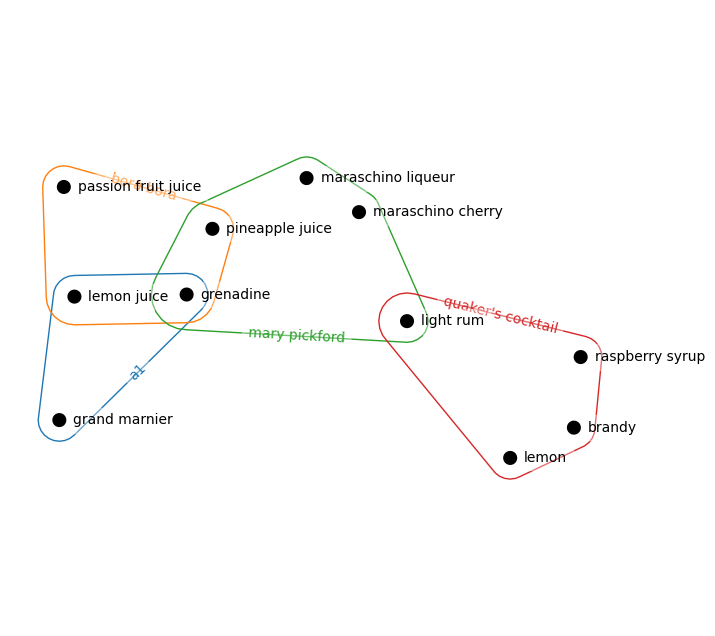

In [167]:
H_restriced = H_small.restrict_to_nodes(list(list(K)[1]))

hnx.draw(H_restriced)

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


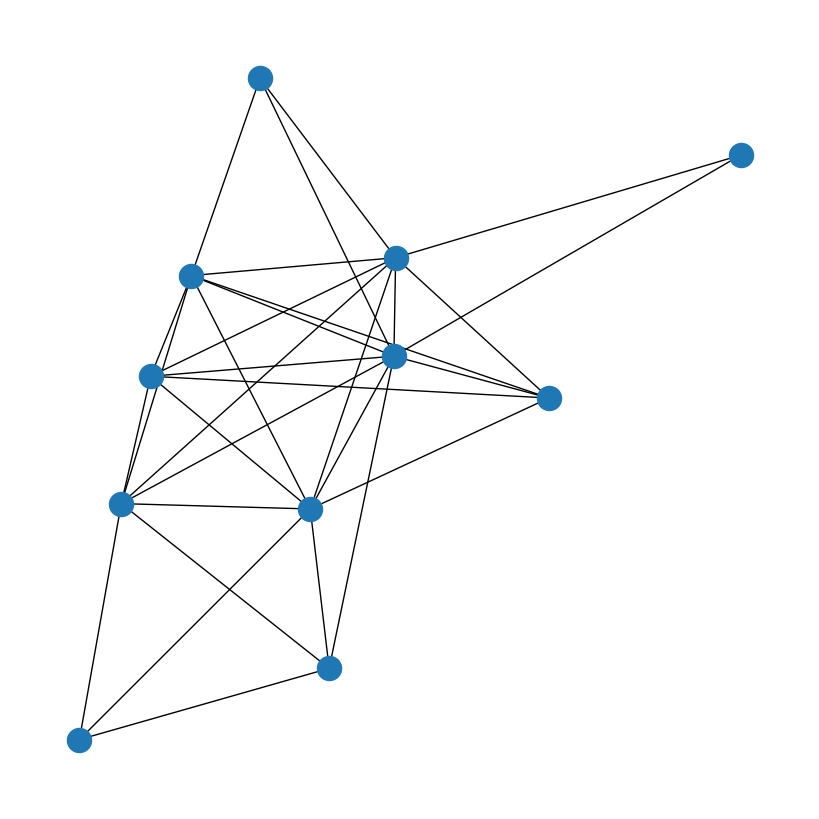

In [168]:
H_restriced = H.restrict_to_nodes(list(list(K)[1]))

g = H_restriced.get_linegraph(edges=False)
nx.draw(g)

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/s

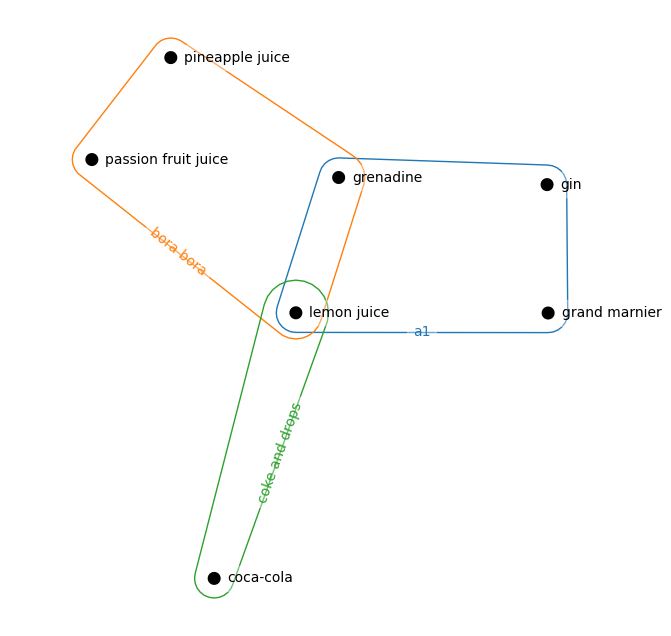

In [169]:
ings = {"grenadine", "coca-cola", "vodka", "lemon juice", "pineapple juice", "gin", "passion fruit juice", "grand marnier"}

can_be_made = []

for edge in H.edges:
    if(set(H.incidence_dict[edge]).issubset(ings)):
        can_be_made.append(edge)

H_can_be_made = H.restrict_to_edges(can_be_made)
hnx.draw(H_can_be_made)